In [1]:
from Clases.Codigo import *

In [62]:
bp=blackPhospho()
#print(bp)

In [5]:
maximo=10
u,v=bp.u,bp.v
magicAngles = []
for k in range(1,(2*maximo)+1):
        for i in range(1,k):
            j = k-i
            if (i<(maximo+1) and j<(maximo+1)):
                v1=m2V(u,v,(i,-j))
                v2=m2V(u,v,(i,j))
                v3=m2V(u,v,(-i,j))
                magicAngles.append([cAng(v1,v2),(i,j),(i,-j)])
                print("Ang:{:.4f}º v1=({},{}) v2=({},{})".format(cAng(v1,v2),i,j,i,-j))
                magicAngles.append([cAng(v3,v2),(i,j),(-i,j)])
                print("Ang:{:.4f}º v1=({},{}) v2=({},{})".format(cAng(v3,v2),i,j,-i,j))


Ang:108.0233º v1=(1,1) v2=(1,-1)
Ang:71.9767º v1=(1,1) v2=(-1,1)
Ang:140.0865º v1=(1,2) v2=(1,-2)
Ang:39.9135º v1=(1,2) v2=(-1,2)
Ang:69.0937º v1=(2,1) v2=(2,-1)
Ang:110.9063º v1=(2,1) v2=(-2,1)
Ang:152.7836º v1=(1,3) v2=(1,-3)
Ang:27.2164º v1=(1,3) v2=(-1,3)
Ang:108.0233º v1=(2,2) v2=(2,-2)
Ang:71.9767º v1=(2,2) v2=(-2,2)
Ang:49.3093º v1=(3,1) v2=(3,-1)
Ang:130.6907º v1=(3,1) v2=(-3,1)
Ang:159.4192º v1=(1,4) v2=(1,-4)
Ang:20.5808º v1=(1,4) v2=(-1,4)
Ang:128.3317º v1=(2,3) v2=(2,-3)
Ang:51.6683º v1=(2,3) v2=(-2,3)
Ang:85.1027º v1=(3,2) v2=(3,-2)
Ang:94.8973º v1=(3,2) v2=(-3,2)
Ang:37.9913º v1=(4,1) v2=(4,-1)
Ang:142.0087º v1=(4,1) v2=(-4,1)
Ang:163.4716º v1=(1,5) v2=(1,-5)
Ang:16.5284º v1=(1,5) v2=(-1,5)
Ang:140.0865º v1=(2,4) v2=(2,-4)
Ang:39.9135º v1=(2,4) v2=(-2,4)
Ang:108.0233º v1=(3,3) v2=(3,-3)
Ang:71.9767º v1=(3,3) v2=(-3,3)
Ang:69.0937º v1=(4,2) v2=(4,-2)
Ang:110.9063º v1=(4,2) v2=(-4,2)
Ang:30.7945º v1=(5,1) v2=(5,-1)
Ang:149.2055º v1=(5,1) v2=(-5,1)
Ang:166.1971º v1=(1,6) v2=

In [3]:
def buscaSV(vectU,vectV, th, rango=15, limDelta=0.1, show=True):
    lim = limDelta
    f1, f2 = 0, 0
    res = [[],[]]
    rmin = [0,0,0,0,0.0]
    rmin2 = [0,0,0,0,0.0]
    ang = math.radians(th)
    cos = math.cos(ang)
    sen = math.sin(ang)
    ru, rv = rota(vectU,th), rota(vectV,th)
    (u1,u2) = vectU
    (v1,v2) = vectV
    ax1 = (u2*v1)-(u1*v2)
    ax2 = (u1*v1)+(u2*v2)
    ax3 = (v1**2)+(v2**2)
    ax4 = (u1**2)+(u2**2)
    delta=0.0
    for k in range(1,(2*rango)+1):
        for i in range(1,k):
            j = k-i
            if(i<(rango+1) and j<(rango+1)):
                # Buscando en a+
                a,b = i,-j
                c = (a*(ax1*cos-ax2*sen)/ax1)-(b*(ax3*sen)/ax1)
                d = (b*(ax1*cos+ax2*sen)/ax1)+(a*(ax4*sen)/ax1)
                r1 = sumaV(multV(a,vectU),multV(b,vectV))
                r2 = sumaV(multV(round(c),ru),multV(round(d),rv))
                delta = dist((0,0),r1)/dist((0,0),r2)
                err = dist(r1,r2)*(abs(delta))
                if (err<limDelta):
                    if(abs(1-delta)<0.03):
                        res[0].append([[a,b],[round(c),round(d)],delta])
                        print(">({},{})-({},{}): Delta={}%".format(a,b,round(c),round(d),delta*100),":",dist(r1,r2))
                # Buscando en a-
                if j!=0:
                    a,b = i,j
                    c = (a*(ax1*cos-ax2*sen)/ax1)-(b*(ax3*sen)/ax1)
                    d = (b*(ax1*cos+ax2*sen)/ax1)+(a*(ax4*sen)/ax1)
                    r1 = sumaV(multV(a,vectU),multV(b,vectV))
                    r2 = sumaV(multV(round(c),ru),multV(round(d),rv))
                    delta = dist((0,0),r1)/dist((0,0),r2)
                    err = dist(r1,r2)*(abs(delta))
                    if (err<limDelta):
                        if(abs(1-delta)<0.03):
                            res[1].append([[a,b],[round(c),round(d)],delta])
                            print(">>({},{})-({},{}): Delta={}%".format(a,b,round(c),round(d),delta*100),":",dist(r1,r2))
    return res
def dameP(r,theta):
    tmin=200
    angR=0.0
    resultado=""
    P=(1,0,0,1)
    for i in range(len(r[0])):
        for j in range(len(r[1])):
            [m,p] = r[0][i][0]
            [n,q] = r[1][j][0]
            tam = (m*q)-(n*p)
            ang = cAng(m2V(u,v,(m,p)),m2V(u,v,(n,q)))
            print((m,p),(n,q),"det=",tam,"Ang={}°".format(ang))
            if tam==tmin:
                if abs(ang-90)<abs(angR-90):
                    resultado="\nMejor P para Theta={}:\n|{}\t{}|\n|{}\t{}|\nDet={}".format(theta,m,n,p,q,tam)
                    P = (m,n,p,q)
                    angR=ang
            if tam<tmin:
                resultado="\nMejor P para Theta={}:\n|{}\t{}|\n|{}\t{}|\nDet={}".format(theta,m,n,p,q,tam)
                P = (m,n,p,q)
                tmin=tam
    print(resultado)
    return P

In [6]:
print("Angulo:{:.5f}°".format(magicAngles[2][0]))
rl=buscaSV(u,v,magicAngles[2][0],limDelta=0.3)

Angulo:140.08648°
>>(1,2)-(1,-2): Delta=100.0% : 2.5121479338940403e-15
>>(2,4)-(2,-4): Delta=100.0% : 5.0242958677880805e-15
>>(3,6)-(3,-6): Delta=100.0% : 6.4047456679787536e-15
>(8,-1)-(-7,-3): Delta=99.87246873171426% : 0.19002242739170414
>(7,-3)-(-8,-1): Delta=100.12769411821422% : 0.19002242739170663
>>(9,1)-(-6,-5): Delta=99.69666999863442% : 0.19002242739170536
>(6,-5)-(-9,1): Delta=100.30425289166602% : 0.1900224273917054
>>(4,8)-(4,-8): Delta=100.0% : 1.0048591735576161e-14
>(5,-7)-(-10,3): Delta=100.35898279165703% : 0.19002242739170755
>(4,-9)-(-11,5): Delta=100.34938334583367% : 0.19002242739170816
>>(10,3)-(-5,-7): Delta=99.64230128517517% : 0.1900224273917045
>(3,-11)-(-12,7): Delta=100.31935975545352% : 0.19002242739171485
>(12,-2)-(-11,-4): Delta=100.0817057265314% : 0.27917196874684697
>(2,-13)-(-13,9): Delta=100.28670848192579% : 0.19002242739170724
>>(5,10)-(5,-10): Delta=100.00000000000003% : 1.0048591735576161e-14
>(11,-4)-(-12,-2): Delta=99.91836097722529% : 0.2

In [7]:
dameP(rl,magicAngles[2][0])

(8, -1) (1, 2) det= 17 Ang=79.80937823852581°
(8, -1) (2, 4) det= 34 Ang=79.80937823852581°
(8, -1) (3, 6) det= 51 Ang=79.80937823852581°
(8, -1) (9, 1) det= 17 Ang=18.464754407762733°
(8, -1) (4, 8) det= 68 Ang=79.80937823852581°
(8, -1) (10, 3) det= 34 Ang=32.211234602360086°
(8, -1) (5, 10) det= 85 Ang=79.80937823852581°
(8, -1) (11, 5) det= 51 Ang=41.80842266630005°
(8, -1) (14, 2) det= 30 Ang=20.894712251558648°
(8, -1) (6, 12) det= 102 Ang=79.80937823852581°
(8, -1) (12, 7) det= 68 Ang=48.53872463879471°
(8, -1) (15, 4) det= 47 Ang=29.928984988896357°
(8, -1) (7, 14) det= 119 Ang=79.80937823852581°
(8, -1) (13, 9) det= 85 Ang=53.39618893401798°
(8, -1) (14, 11) det= 102 Ang=57.019095531189755°
(8, -1) (15, 13) det= 119 Ang=59.804492152862686°
(7, -3) (1, 2) det= 17 Ang=100.58939317261851°
(7, -3) (2, 4) det= 34 Ang=100.58939317261851°
(7, -3) (3, 6) det= 51 Ang=100.58939317261851°
(7, -3) (9, 1) det= 34 Ang=39.24476934185548°
(7, -3) (4, 8) det= 68 Ang=100.58939317261851°
(7, -3)

(7, 1, -3, 2)

In [8]:
rl

[[[[8, -1], [-7, -3], 0.9987246873171426],
  [[7, -3], [-8, -1], 1.0012769411821423],
  [[6, -5], [-9, 1], 1.0030425289166602],
  [[5, -7], [-10, 3], 1.0035898279165703],
  [[4, -9], [-11, 5], 1.0034938334583368],
  [[3, -11], [-12, 7], 1.0031935975545352],
  [[12, -2], [-11, -4], 1.000817057265314],
  [[2, -13], [-13, 9], 1.0028670848192578],
  [[11, -4], [-12, -2], 0.999183609772253],
  [[1, -15], [-14, 11], 1.0025696455433954],
  [[10, -6], [-13, 0], 0.9978017018978993],
  [[9, -8], [-14, 2], 0.9969572829002772],
  [[8, -10], [-15, 4], 0.9966029860358532],
  [[7, -12], [-16, 6], 0.9965606688704253],
  [[6, -14], [-17, 8], 0.99667847516923],
  [[15, -13], [-23, 3], 0.9994211133577184],
  [[14, -15], [-24, 5], 0.9993661423746354]],
 [[[1, 2], [1, -2], 1.0],
  [[2, 4], [2, -4], 1.0],
  [[3, 6], [3, -6], 1.0],
  [[9, 1], [-6, -5], 0.9969666999863442],
  [[4, 8], [4, -8], 1.0],
  [[10, 3], [-5, -7], 0.9964230128517517],
  [[5, 10], [5, -10], 1.0000000000000002],
  [[11, 5], [-4, -9], 0.9

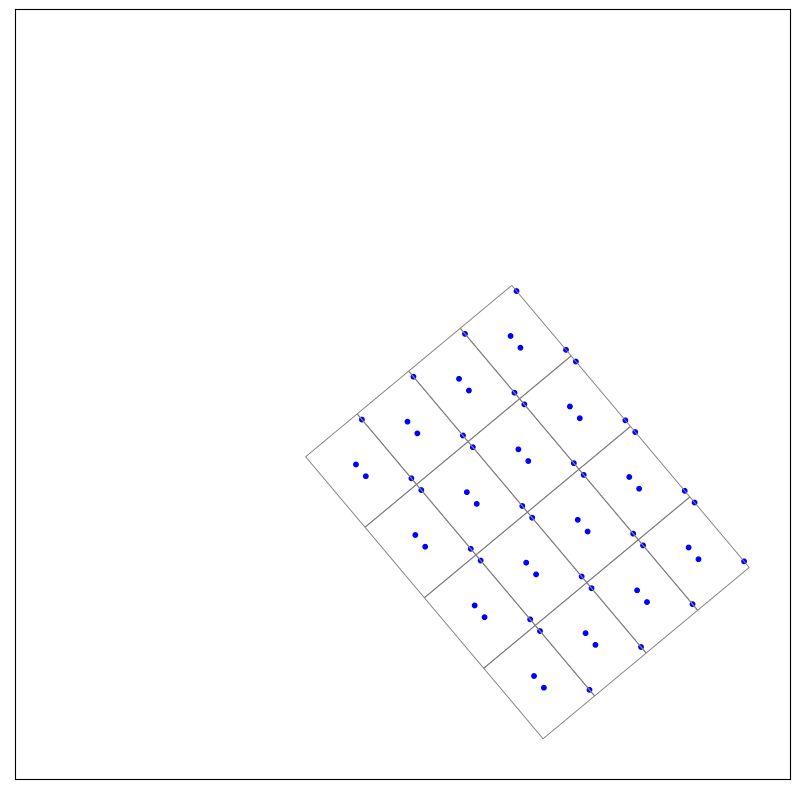

1

In [63]:
bpr=blackPhospho()
bpr=bpr.mRot(-magicAngles[2][0])
for a in bpr.atms[0]:
    a.color='blue'
bpr.showNM(4,4)

In [64]:
ru,rv=bpr.u,bpr.v
u,v=bp.u,bp.v

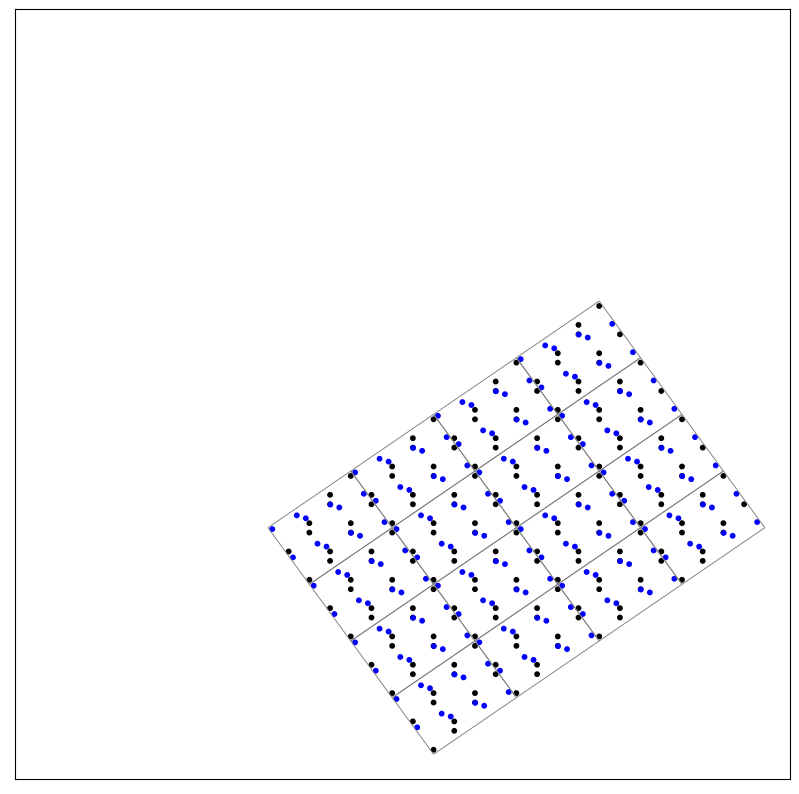

1

In [55]:
su,sv=transfVs(u,v,(1,2,-1,1))
sCell=superMesh(su,sv,[bp,bpr])
sCell.showNM(4,4,name='phospho(1,-1 sin modificar)')
sCell.exporta(name='phospho(1,-1 sin modificar)')

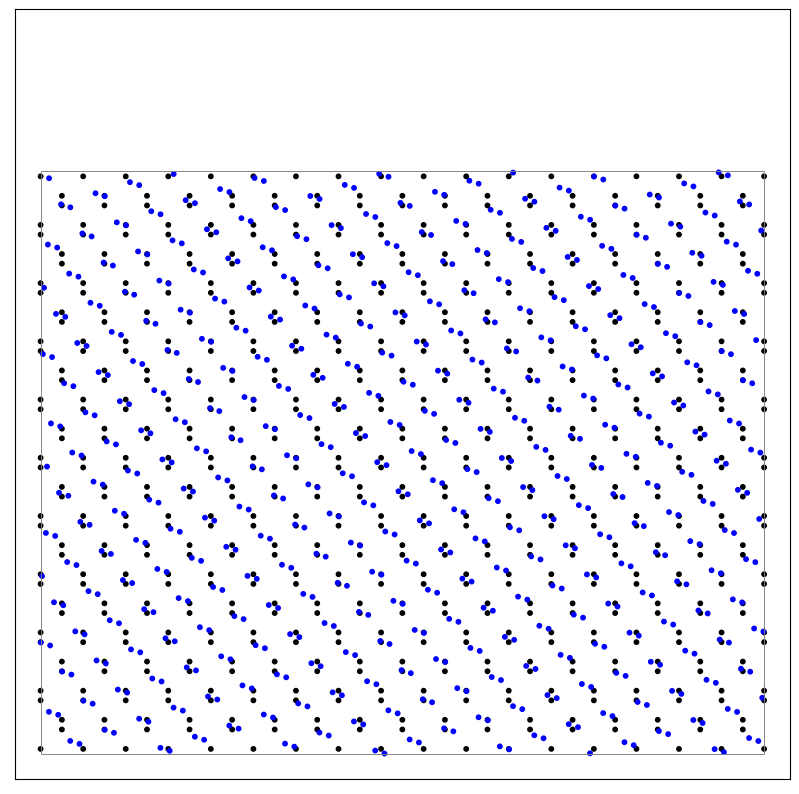

1

In [56]:
su,sv=transfVs(u,v,(17,0,0,10))
sCell=superMesh(su,sv,[bp,bpr])
sCell.showNM(1,1,name='bpb(1,-1)-SinCambios')

In [57]:
print("Vectores en Capa 1:\n\t",m2V(u,v,(1,-1)),",",m2V(u,v,(2,1)))
print("Vectores en Capa 2:\n\t",m2V(ru,rv,(1,1)),",",m2V(ru,rv,(-2,1)))
print("Diferencia en resultados:\n\t",dist(m2V(u,v,(1,-1)),m2V(ru,rv,(1,1))),",",dist(m2V(u,v,(2,1)),m2V(ru,rv,(-2,1))))
#dist(m2V(u,v,(1,-1)),m2V(ru,rv,(1,1)))

Vectores en Capa 1:
	 (3.3061099052, -4.552418232) , (6.6122198104, 4.552418232)
Vectores en Capa 2:
	 (3.3061099052, -4.552418232) , (6.374882132008162, 4.8792253876097265)
Diferencia en resultados:
	 0.0 , 0.403896138310516


In [58]:
#Calculamos el alfa
(x,y) = m2V(u,v,(1,-1))
(x2,y2) = m2V(u,v,(2,1))
alfa = (((y2/x)+(-x2/y))/2)
print("x = {:.4f}\ny = {:.4f}".format(x,y))
print("alfa = {:.4f}".format(alfa))

x = 3.3061
y = -4.5524
alfa = 1.4147


In [59]:
alfaX, alfaY = ((-alfa*y)), ((alfa*x))
print("x' = {:.4f}\ny' = {:.4f}".format(alfaX, alfaY))
cAng((x,y), (alfaX, alfaY))

x' = 6.4404
y' = 4.6772


90.0

In [60]:
#Redimencionamos los vectores generadores de ambas capas con los que obtuvimos. 
bp.u, bp.v = transfVs((x,y), (alfaX, alfaY),(1/3,-2/3,1/3,1/3))
bpr.u, bpr.v = transfVs((x,y), (alfaX, alfaY),(1/3,2/3,-1/3,1/3))
#Actualizando valores
ru,rv=bpr.u,bpr.v
u,v=bp.u,bp.v
(a1,a2),(b1,b2) = bp.u, bp.v
print("a  = ({:.4f} , {:.4f})\nb  = ({:.4f},{:.4f})".format(a1,a2,b1,b2))
(a1,a2),(b1,b2) = bpr.u, bpr.v
print("a' = ({:.4f} , {:.4f})\nb' = ({:.4f},{:.4f})".format(a1,a2,b1,b2))

a  = (3.2488 , 0.0416)
b  = (-0.0573,4.5940)
a' = (-1.0448 , -3.0765)
b' = (4.3509,-1.4759)


### Modificamos los vectores generadores de ambas capas para que coincidan.
Dado que con los vectores generadores tal y como los tenemos no coinciden los resultados, los modificamos de tal manera que si lo hagan, por lo que buscamos los vectores $a,b,a',b'$ tales que cumplan:

$$
\left(
    \begin{array}{cc}
        1 & -1 \\
        2 & 1
    \end{array}
\right)
\cdot
\left(
    \begin{array}{cc}
        a \\
        b
    \end{array}
\right)
=
\left(
    \begin{array}{cc}
        1 & 1 \\
        -2 & 1
    \end{array}
\right)
\cdot
\left(
    \begin{array}{cc}
        a' \\
        b'
    \end{array}
\right)
=
\left(
    \begin{array}{cc}
        x & y\\
        -\alpha y & \alpha x
    \end{array}
\right)
$$

Donde x=3.3061, y=-4.5524 y $\alpha$=1.4147, (valores que aproximan a los resultados que queremos), así tenemos que:

$$
\left(
    \begin{array}{cc}
        a \\
        b
    \end{array}
\right)
=
\left(
    \begin{array}{cc}
        1 & -1 \\
        2 & 1
    \end{array}
\right)^{-1}
\cdot
\left(
    \begin{array}{cc}
        3.3061 & -4.5524\\
        6.4404 & 4.6772
    \end{array}
\right)
$$

$$
\left(
    \begin{array}{cc}
        a' \\
        b'
    \end{array}
\right)
=
\left(
    \begin{array}{cc}
        1 & 1 \\
        -2 & 1
    \end{array}
\right)^{-1}
\cdot
\left(
    \begin{array}{cc}
        3.3061 & -4.5524\\
        6.4404 & 4.6772
    \end{array}
\right)
$$
Por lo tanto:

$$
\left(
    \begin{array}{cc}
        a \\
        b
    \end{array}
\right)
=
\left(
    \begin{array}{cc}
        3.2488 & 0.0416\\
        -0.0573 & 4.5940
    \end{array}
\right)
\,\, y \,\,
\left(
    \begin{array}{cc}
        a' \\
        b'
    \end{array}
\right)
=
\left(
    \begin{array}{cc}
        -1.0448 & -3.0765\\
        4.3509 & -1.4759
    \end{array}
\right)
$$

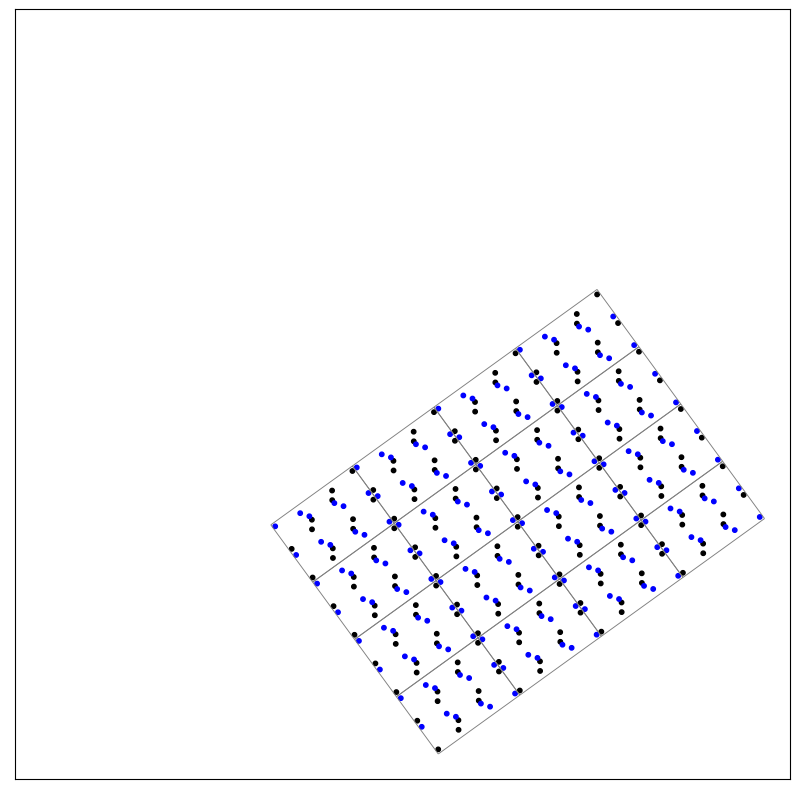

1

In [48]:
su,sv=transfVs(u,v,(1,2,-1,1))
sCell=superMesh(su,sv,[bp,bpr])
sCell.showNM(4,4)
sCell.exporta(name='phospho(1,-1 modificado)')

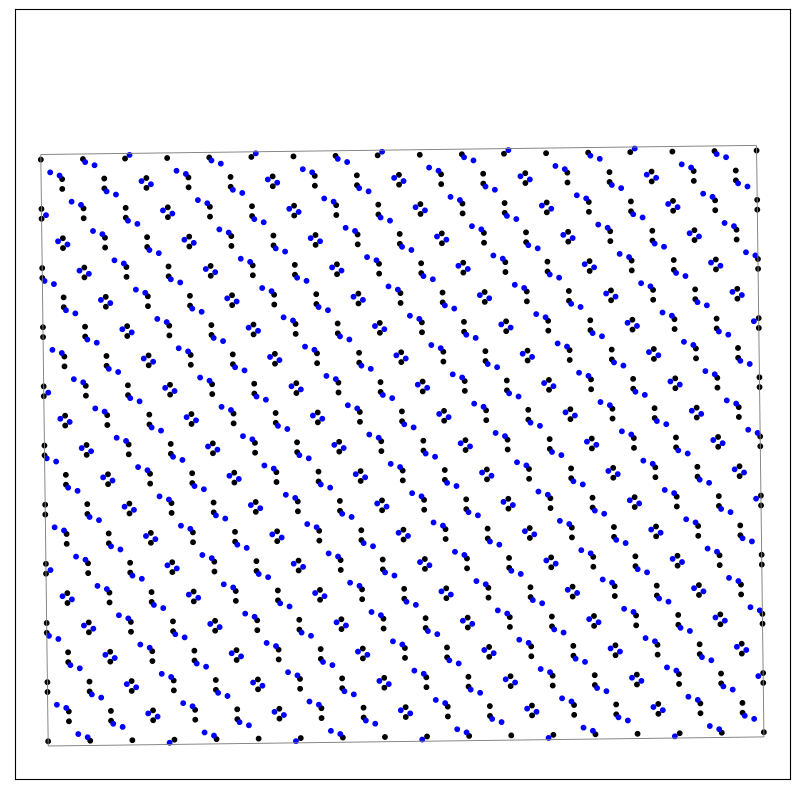

1

In [51]:
su,sv=transfVs(u,v,(17,0,0,10))
sCell=superMesh(su,sv,[bp,bpr])
sCell.showNM(1,1,name='bpb(1,-1)-Modificado')

In [61]:
superMesh(u,v,[bp]).exporta(name='bp-Modificado (capa1)')
superMesh(ru,rv,[bpr]).exporta(name='bp-Modificado (capa2)')

1

In [18]:
alfaX, alfaY, x, y

(6.440384377813501, 4.677210550452904, 3.3061099052, -4.552418232)

In [65]:
print("Vectores en Capa 1:\n\t",m2V(u,v,(1,-2)),",",m2V(u,v,(4,1)))
print("Vectores en Capa 2:\n\t",m2V(ru,rv,(1,2)),",",m2V(ru,rv,(-4,1)))
print("Diferencia en resultados:\n\t",dist(m2V(u,v,(1,-2)),m2V(ru,rv,(1,2))),",",dist(m2V(u,v,(4,1)),m2V(ru,rv,(-4,1))))
#dist(m2V(u,v,(1,-1)),m2V(ru,rv,(1,1)))

Vectores en Capa 1:
	 (3.3061099052, -9.104836464) , (13.2244396208, 4.552418232)
Vectores en Capa 2:
	 (3.306109905200002, -9.104836463999998) , (13.064298477283948, 4.993437727624843)
Diferencia en resultados:
	 2.5121479338940403e-15 , 0.4691943961385513


In [66]:
#Calculamos el alfa
(x,y) = m2V(u,v,(1,-2))
(x2,y2) = m2V(u,v,(4,1))
alfa = (((y2/x)+(-x2/y))/2)
print("x = {:.4f}\ny = {:.4f}".format(x,y))
print("alfa = {:.4f}".format(alfa))

x = 3.3061
y = -9.1048
alfa = 1.4147


In [67]:
alfaX, alfaY = ((-alfa*y)), ((alfa*x))
print("x' = {:.4f}\ny' = {:.4f}".format(alfaX, alfaY))
cAng((x,y), (alfaX, alfaY))

x' = 12.8808
y' = 4.6772


90.0

In [68]:
#Redimencionamos los vectores generadores de ambas capas con los que obtuvimos. 
bp.u, bp.v = transfVs((x,y), (alfaX, alfaY),(1/9,-4/9,2/9,1/9))
bpr.u, bpr.v = transfVs((x,y), (alfaX, alfaY),(1/9,4/9,-2/9,1/9))
#Actualizando valores
ru,rv=bpr.u,bpr.v
u,v=bp.u,bp.v
(a1,a2),(b1,b2) = bp.u, bp.v
print("a  = ({:.4f} , {:.4f})\nb  = ({:.4f},{:.4f})".format(a1,a2,b1,b2))
(a1,a2),(b1,b2) = bpr.u, bpr.v
print("a' = ({:.4f} , {:.4f})\nb' = ({:.4f},{:.4f})".format(a1,a2,b1,b2))

a  = (3.2297 , 0.0277)
b  = (-0.0382,4.5663)
a' = (-2.4950 , -2.0510)
b' = (2.9006,-3.5269)


### Modificamos los vectores generadores de ambas capas para que coincidan.
Dado que con los vectores generadores tal y como los tenemos no coinciden los resultados, los modificamos de tal manera que si lo hagan, por lo que buscamos los vectores $a,b,a',b'$ tales que cumplan:

$$
\left(
    \begin{array}{cc}
        1 & -2 \\
        4 & 1
    \end{array}
\right)
\cdot
\left(
    \begin{array}{cc}
        a \\
        b
    \end{array}
\right)
=
\left(
    \begin{array}{cc}
        1 & 2 \\
        -4 & 1
    \end{array}
\right)
\cdot
\left(
    \begin{array}{cc}
        a' \\
        b'
    \end{array}
\right)
=
\left(
    \begin{array}{cc}
        x & y\\
        -\alpha y & \alpha x
    \end{array}
\right)
$$

Donde x=3.3061, y=-9.1048 y $\alpha$=1.4147, (valores que aproximan a los resultados que queremos), así tenemos que:

$$
\left(
    \begin{array}{cc}
        a \\
        b
    \end{array}
\right)
=
\left(
    \begin{array}{cc}
        1 & -2 \\
        4 & 1
    \end{array}
\right)^{-1}
\cdot
\left(
    \begin{array}{cc}
        3.3061 & -9.1048\\
        12.8808 & 4.6772
    \end{array}
\right)
$$

$$
\left(
    \begin{array}{cc}
        a' \\
        b'
    \end{array}
\right)
=
\left(
    \begin{array}{cc}
        1 & 2 \\
        -4 & 1
    \end{array}
\right)^{-1}
\cdot
\left(
    \begin{array}{cc}
        3.3061 & -9.1048\\
        12.8808 & 4.6772
    \end{array}
\right)
$$
Por lo tanto:

$$
\left(
    \begin{array}{cc}
        a \\
        b
    \end{array}
\right)
=
\left(
    \begin{array}{cc}
        3.2488 & 0.0277\\
        -0.0382 & 4.5663
    \end{array}
\right)
\,\, y \,\,
\left(
    \begin{array}{cc}
        a' \\
        b'
    \end{array}
\right)
=
\left(
    \begin{array}{cc}
        -2.4950 & -2.0510\\
        2.9006 & -3.5269
    \end{array}
\right)
$$



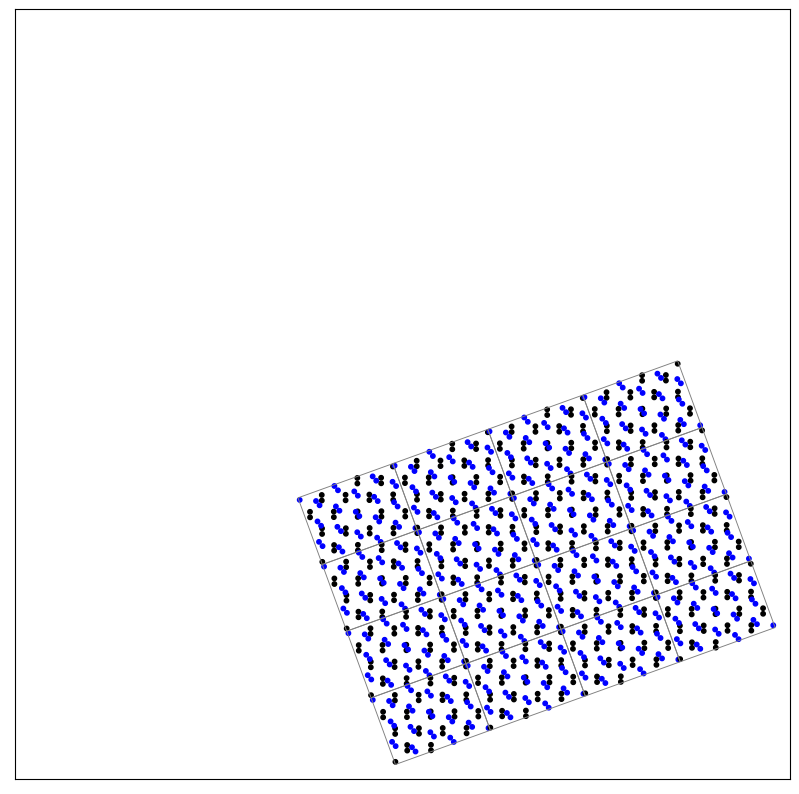

1

In [69]:
su,sv=transfVs(u,v,(1,4,-2,1))
sCell=superMesh(su,sv,[bp,bpr])
sCell.showNM(4,4)
sCell.exporta(name='phospho(1,-2 modificado)')

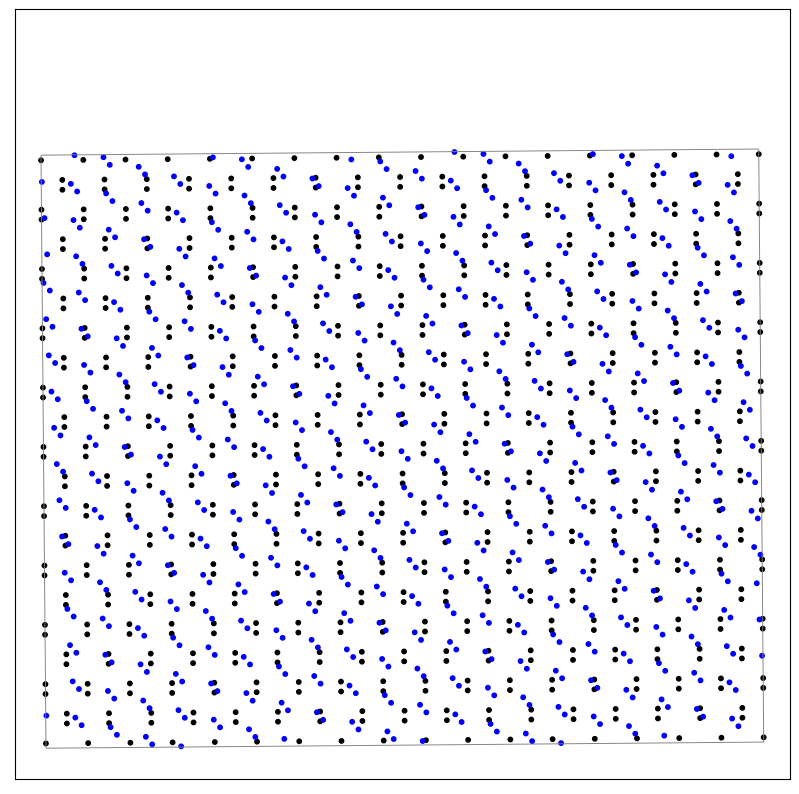

1

In [70]:
su,sv=transfVs(u,v,(17,0,0,10))
sCell=superMesh(su,sv,[bp,bpr])
sCell.showNM(1,1,name='bpb(1,-2)-Modificado')